In [2]:
# Load dataset Used Cars Price Prediction

!wget https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv

--2025-10-07 06:46:11--  https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602640 (589K) [text/plain]
Saving to: ‘used_cars_price_fiks.csv’

used_cars_price_fik 100%[===================>] 588.52K  --.-KB/s    in 0.03s   

2025-10-07 06:46:11 (16.5 MB/s) - ‘used_cars_price_fiks.csv’ saved [602640/602640]



In [24]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
# Baca file CSV ke dalam DataFrame dengan nama 'df'
df = pd.read_csv('used_cars_price_fiks.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  5719 non-null   float64
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


In [6]:
print(df.isna().sum())  # cek missing values

Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven    300
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64


In [7]:
print(df.duplicated().sum())  # cek duplikat

0


# b. Exploratory Data Analysis (EDA)

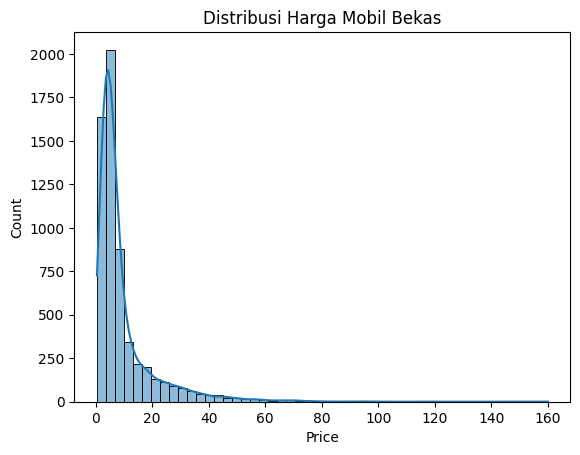

In [8]:
# Distribusi harga mobil
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribusi Harga Mobil Bekas")
plt.show()

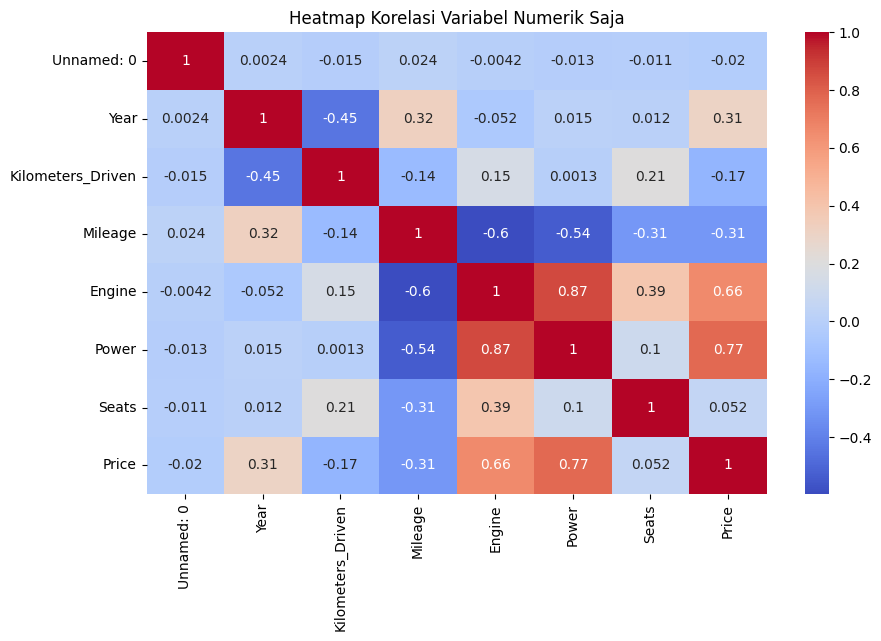

In [9]:
# Korelasi antar fitur numerik
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Variabel Numerik Saja")
plt.show()


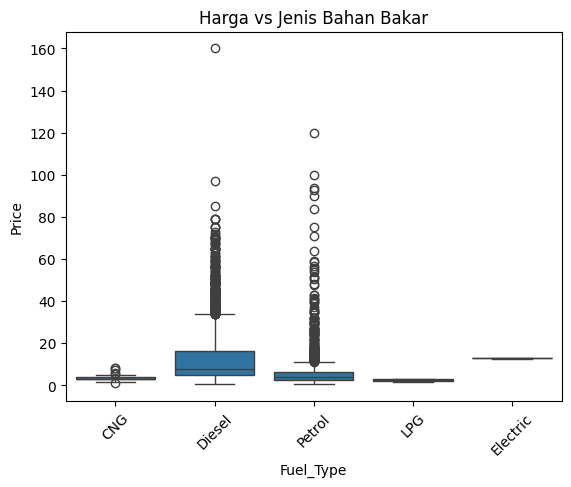

In [10]:
# Harga rata-rata berdasarkan Fuel_Type
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.xticks(rotation=45)
plt.title("Harga vs Jenis Bahan Bakar")
plt.show()

# c. Data Cleaning

In [11]:
# Hapus kolom yang tidak relevan
df_clean = df.drop(columns=['Unnamed: 0', 'Name'])

In [12]:

# Imputasi missing values numerik
for col in ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

/tmp/ipython-input-2547318022.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


In [13]:
# Imputasi missing values kategorikal
for col in ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

/tmp/ipython-input-1117566821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


In [14]:
# Cek ulang
print(df_clean.isna().sum())

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


# d. Data Transformasi

In [15]:
# One-hot encoding untuk kolom kategorikal
df_final = pd.get_dummies(df_clean, drop_first=True)

print(df_final.shape)

(6019, 25)


e. Data Final

In [16]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   int64  
 1   Kilometers_Driven          6019 non-null   float64
 2   Mileage                    6019 non-null   float64
 3   Engine                     6019 non-null   float64
 4   Power                      6019 non-null   float64
 5   Seats                      6019 non-null   float64
 6   Price                      6019 non-null   float64
 7   Location_Bangalore         6019 non-null   bool   
 8   Location_Chennai           6019 non-null   bool   
 9   Location_Coimbatore        6019 non-null   bool   
 10  Location_Delhi             6019 non-null   bool   
 11  Location_Hyderabad         6019 non-null   bool   
 12  Location_Jaipur            6019 non-null   bool   
 13  Location_Kochi             6019 non-null   bool 

In [17]:
print(df_final.head())

   Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price  \
0  2010            72000.0    26.60   998.0   58.16    5.0   1.75   
1  2015            41000.0    19.67  1582.0  126.20    5.0  12.50   
2  2011            46000.0    18.20  1199.0   88.70    5.0   4.50   
3  2012            87000.0    20.77  1248.0   88.76    7.0   6.00   
4  2013            40670.0    15.20  1968.0  140.80    5.0  17.74   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0               False             False                False  ...   
1               False             False                False  ...   
2               False              True                False  ...   
3               False              True                False  ...   
4               False             False                 True  ...   

   Location_Mumbai  Location_Pune  Fuel_Type_Diesel  Fuel_Type_Electric  \
0             True          False             False               False   
1            False  

## 3. Melakukan Data Modeling

In [22]:
# Pisahkan fitur dan target
X = df_final.drop(columns=['Price'])
y = df_final['Price']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Data Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# Model Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
# Prediksi
y_pred = model.predict(X_test_scaled)

## 4. Melakukan tahap evaluasi model

In [27]:
# Evaluasi model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [32]:
print("Evaluasi Model Linear Regression")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Evaluasi Model Linear Regression
R-squared (R²): 0.6930
Mean Absolute Error (MAE): 3.7981
Mean Squared Error (MSE): 37.7749
Root Mean Squared Error (RMSE): 6.1461


## Scatter Plot

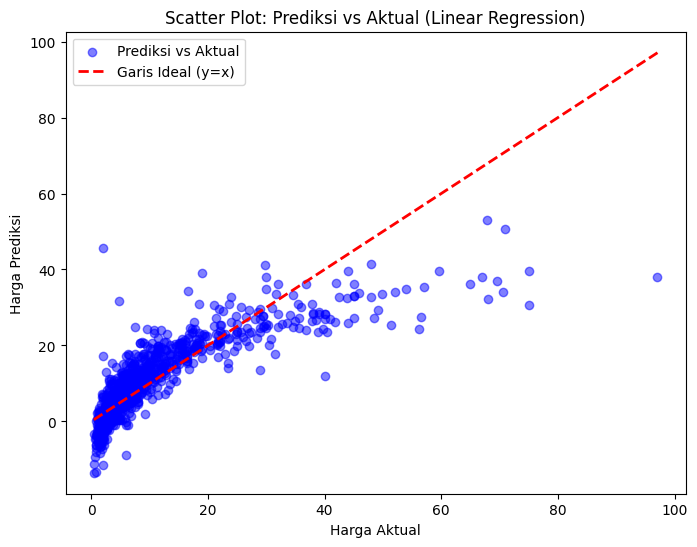

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Prediksi vs Aktual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2, label="Garis Ideal (y=x)")
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Scatter Plot: Prediksi vs Aktual (Linear Regression)")
plt.legend()
plt.show()